# importing data

In [529]:
#essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [530]:
#importing dataset

dataset= pd.read_csv("day.csv")
#dataset['hum'].dtype

In [531]:
#structure of dataset
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [532]:
#converting variable dteday to numeric
dataset['dteday']=dataset['dteday'].str.replace('\D','').astype(int)
#dataset

# outlier dectection and removal

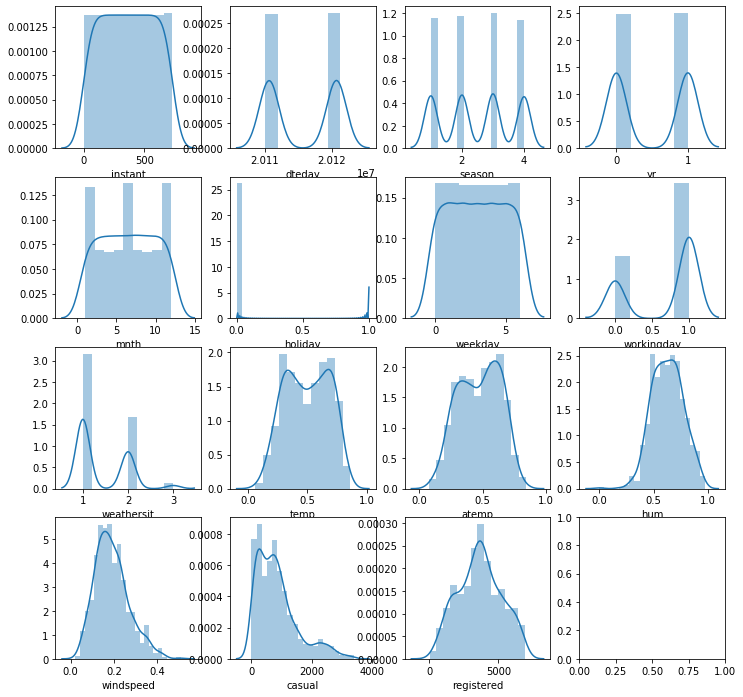

In [533]:

#analysis using histogram and boxplot 

#histogram
import seaborn as sns
f,axes=plt.subplots(4,4,figsize=(12,12))
sns.distplot(dataset['instant'],ax=axes[0,0])
sns.distplot(dataset['dteday'],ax=axes[0,1])
sns.distplot(dataset['season'],ax=axes[0,2])
sns.distplot(dataset['yr'],ax=axes[0,3])
sns.distplot(dataset['mnth'],ax=axes[1,0])
sns.distplot(dataset['holiday'],ax=axes[1,1])
sns.distplot(dataset['weekday'],ax=axes[1,2])
sns.distplot(dataset['workingday'],ax=axes[1,3])
sns.distplot(dataset['weathersit'],ax=axes[2,0])
sns.distplot(dataset['temp'],ax=axes[2,1])
sns.distplot(dataset['atemp'],ax=axes[2,2])
sns.distplot(dataset['hum'],ax=axes[2,3])
sns.distplot(dataset['windspeed'],ax=axes[3,0])
sns.distplot(dataset['casual'],ax=axes[3,1])
sns.distplot(dataset['registered'],ax=axes[3,2])

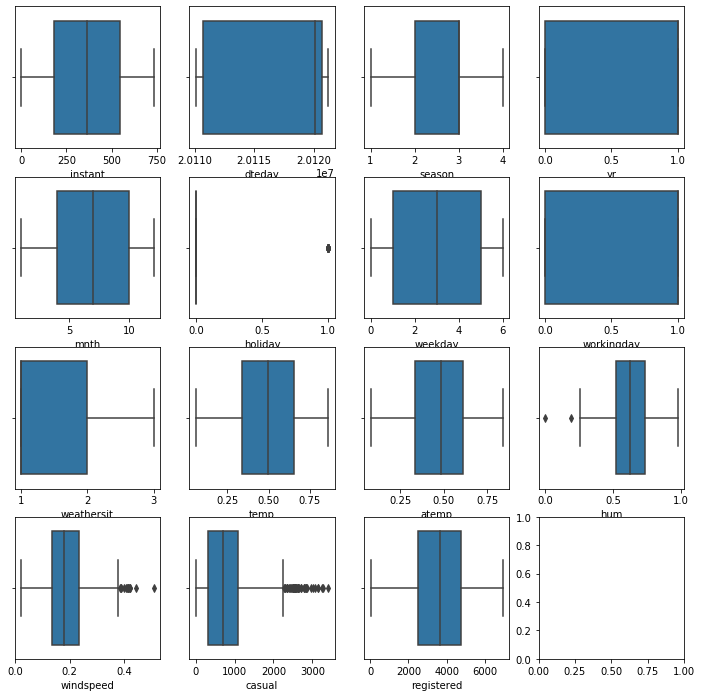

In [534]:
#boxplot 
import seaborn as sns
f,axes=plt.subplots(4,4,figsize=(12,12))
sns.boxplot(dataset['instant'],ax=axes[0,0])
sns.boxplot(dataset['dteday'],ax=axes[0,1])
sns.boxplot(dataset['season'],ax=axes[0,2])
sns.boxplot(dataset['yr'],ax=axes[0,3])
sns.boxplot(dataset['mnth'],ax=axes[1,0])
sns.boxplot(dataset['holiday'],ax=axes[1,1])
sns.boxplot(dataset['weekday'],ax=axes[1,2])
sns.boxplot(dataset['workingday'],ax=axes[1,3])
sns.boxplot(dataset['weathersit'],ax=axes[2,0])
sns.boxplot(dataset['temp'],ax=axes[2,1])
sns.boxplot(dataset['atemp'],ax=axes[2,2])
sns.boxplot(dataset['hum'],ax=axes[2,3])
sns.boxplot(dataset['windspeed'],ax=axes[3,0])
sns.boxplot(dataset['casual'],ax=axes[3,1])
sns.boxplot(dataset['registered'],ax=axes[3,2])

In [535]:
#REMOVING OUTLIERS

In [536]:
#variable hum
q75,q25=np.percentile(dataset['hum'],[75,25])
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
dataset.loc[dataset['hum']<min,'hum']=np.nan
dataset.loc[dataset['hum']>max,'hum']=np.nan

#count NA 
dataset['hum'].isnull().sum()

#replacing NA by mean
dataset['hum']=dataset['hum'].fillna(dataset['hum'].mean())

In [537]:
#variable windspeed
q75,q25=np.percentile(dataset['windspeed'],[75,25])
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
dataset.loc[dataset['windspeed']<min,'windspeed']=np.nan
dataset.loc[dataset['windspeed']>max,'windspeed']=np.nan
#count NA 
dataset['windspeed'].isnull().sum()

#replacing NA by mean
dataset['windspeed']=dataset['windspeed'].fillna(dataset['windspeed'].mean())


In [538]:
#variable casual
q75,q25=np.percentile(dataset['casual'],[75,25])
iqr=q75-q25
min=q25-(iqr*1.5)
max=q75+(iqr*1.5)
dataset.loc[dataset['casual']<min,'casual']=np.nan
dataset.loc[dataset['casual']>max,'casual']=np.nan
#count NA 
dataset['casual'].isnull().sum()

#replacing NA by mean
dataset['casual']=dataset['casual'].fillna(dataset['casual'].mean())


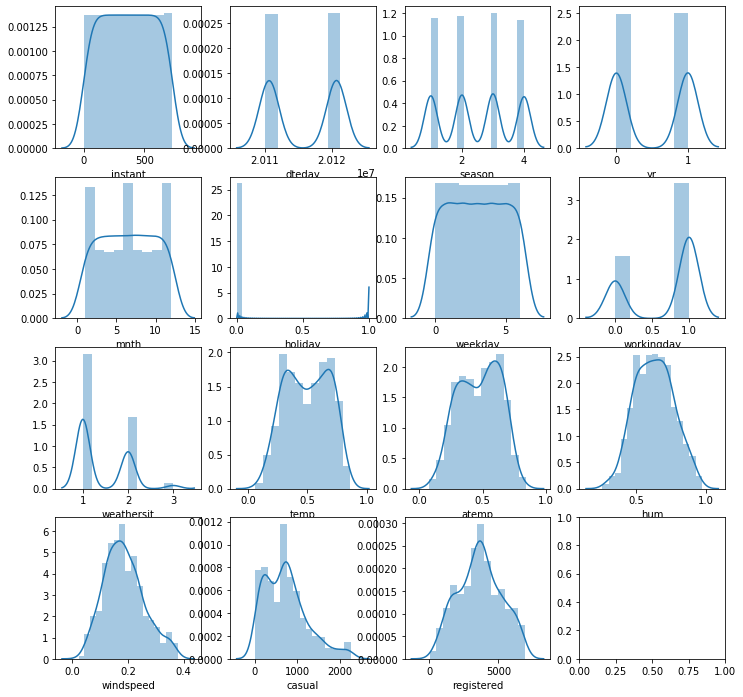

In [539]:
#histogram and boxplot after outlier removal

#histogram
import seaborn as sns
f,axes=plt.subplots(4,4,figsize=(12,12))
sns.distplot(dataset['instant'],ax=axes[0,0])
sns.distplot(dataset['dteday'],ax=axes[0,1])
sns.distplot(dataset['season'],ax=axes[0,2])
sns.distplot(dataset['yr'],ax=axes[0,3])
sns.distplot(dataset['mnth'],ax=axes[1,0])
sns.distplot(dataset['holiday'],ax=axes[1,1])
sns.distplot(dataset['weekday'],ax=axes[1,2])
sns.distplot(dataset['workingday'],ax=axes[1,3])
sns.distplot(dataset['weathersit'],ax=axes[2,0])
sns.distplot(dataset['temp'],ax=axes[2,1])
sns.distplot(dataset['atemp'],ax=axes[2,2])
sns.distplot(dataset['hum'],ax=axes[2,3])
sns.distplot(dataset['windspeed'],ax=axes[3,0])
sns.distplot(dataset['casual'],ax=axes[3,1])
sns.distplot(dataset['registered'],ax=axes[3,2])

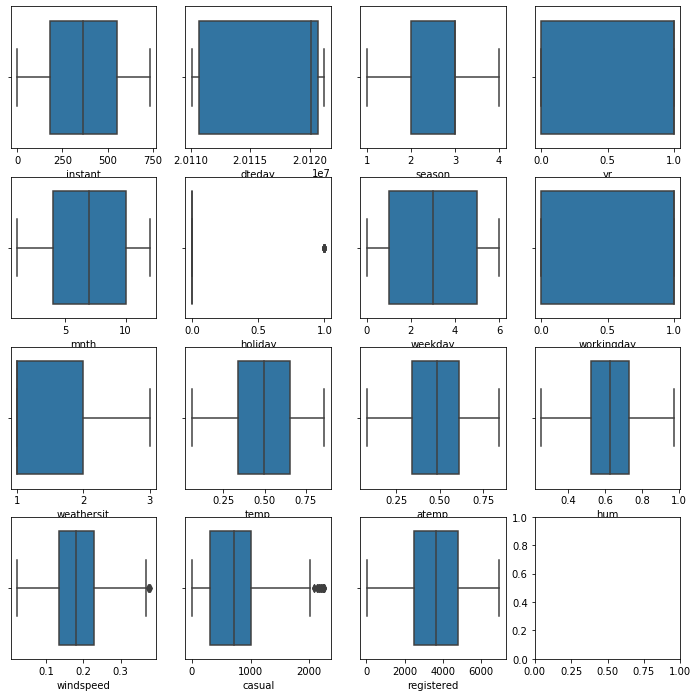

In [540]:
#boxplot 
import seaborn as sns
f,axes=plt.subplots(4,4,figsize=(12,12))
sns.boxplot(dataset['instant'],ax=axes[0,0])
sns.boxplot(dataset['dteday'],ax=axes[0,1])
sns.boxplot(dataset['season'],ax=axes[0,2])
sns.boxplot(dataset['yr'],ax=axes[0,3])
sns.boxplot(dataset['mnth'],ax=axes[1,0])
sns.boxplot(dataset['holiday'],ax=axes[1,1])
sns.boxplot(dataset['weekday'],ax=axes[1,2])
sns.boxplot(dataset['workingday'],ax=axes[1,3])
sns.boxplot(dataset['weathersit'],ax=axes[2,0])
sns.boxplot(dataset['temp'],ax=axes[2,1])
sns.boxplot(dataset['atemp'],ax=axes[2,2])
sns.boxplot(dataset['hum'],ax=axes[2,3])
sns.boxplot(dataset['windspeed'],ax=axes[3,0])
sns.boxplot(dataset['casual'],ax=axes[3,1])
sns.boxplot(dataset['registered'],ax=axes[3,2])

# Correlational analysis

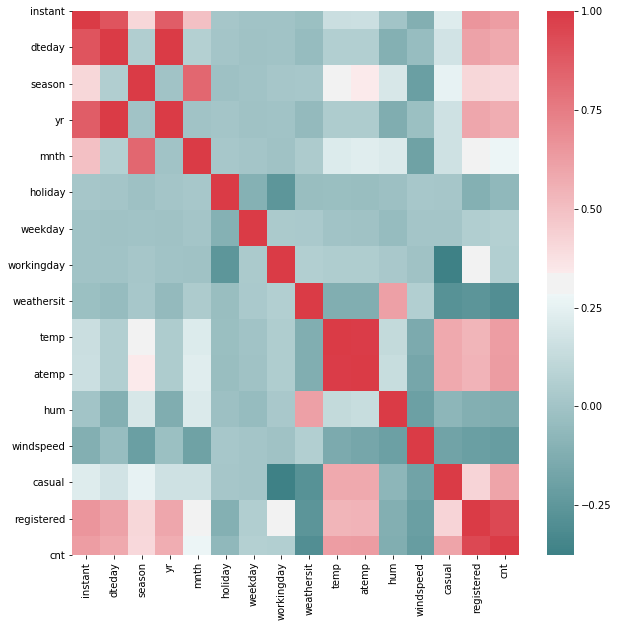

In [541]:
f,ax=plt.subplots(figsize=(10,10))

#generate correlational matrix
corr=dataset.corr()

#create heatmap using seaborn module
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=bool),cmap=sns.diverging_palette(200,10,as_cmap=True))

In [542]:
#removing multicollinear variables
cnames=['mnth','holiday','weekday','workingday','hum','windspeed','registered','casual','cnt']
dataset=dataset.loc[:,cnames]

# removing insignificant variables

In [543]:
import statsmodels.formula.api as sm
cnames_ind=['mnth','holiday','weekday','workingday','hum','windspeed','registered','casual']
X=dataset.loc[:,cnames_ind]
model = sm.ols(formula='cnt~X', data=dataset)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     2276.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:43:01   Log-Likelihood:                -5375.8
No. Observations:                 731   AIC:                         1.077e+04
Df Residuals:                     722   BIC:                         1.081e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    350.5674    104.222      3.364      0.001     145.953     555.182
X[0]         -12.6841      4.472     -2.836      0.005     -21.463      -3.905
X[1]        -120.8147     87.904     -1.374      0.170    -293.393      51.764
X[2]          16.8352      7.075      2.380      0.018       2.945      30.725
X[3]        -739.6771     40.575    -18.230      0.000    -819.335    -660.019
X[4]          59.1586    108.105      0.547      0.584    -153.078     271.395
X[5]        -103.0436    209.869     -0.491      0.624    -515.069     308.982
X[6]           1.1732      0.013     92.627      0.000       1.148       1.198
X[7]           0.5298      0.038     13.846      0.000       0.455       0.605
==============================================================================
Omnibus:                      330.267   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1703.170
Skew:                           2.028   Prob(JB):                         0.00
Kurtosis:                       9.282   Cond. No.                     6.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [544]:
cnames=['mnth','weekday','workingday','registered','casual','cnt']
dataset=dataset.loc[:,cnames]

In [545]:
#dividing into dependent and independent variables

In [546]:
X=dataset.iloc[:,0:5].values
Y=dataset.iloc[:,5].values

# dividing data into train and test

In [547]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# feature scaling 

In [548]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [549]:
X_train

array([[-0.73586181,  1.00540443,  0.66749124, -1.53615406, -1.09597771],
       [-0.44666713,  1.00540443,  0.66749124,  1.60590627,  1.53691405],
       [ 0.99930628,  0.50227145,  0.66749124,  1.81389906,  0.30732042],
       ...,
       [ 0.7101116 ,  1.00540443,  0.66749124,  2.12686626,  1.00799362],
       [ 0.13172223,  1.00540443,  0.66749124,  1.52114432,  1.51739669],
       [ 1.28850096,  0.50227145,  0.66749124,  0.95845537, -0.8071208 ]])

# using multiple linear regression

In [550]:

from sklearn.linear_model import LinearRegression
regressor_lm=LinearRegression()
regressor_lm.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [551]:
#getting r squared value
from sklearn.metrics import r2_score
y_pred_lm=regressor_lm.predict(X_test)
r2_score(y_pred_lm,Y_test)

0.9515628963678664

In [552]:
#using k fold cross validation
from sklearn.model_selection import cross_val_score
accuracy_lm=cross_val_score(estimator=regressor_lm,X=X_train,y=Y_train,cv=10)

In [553]:
#accuracy of linear model
accuracy_lm.mean()

0.961622715242355

# using decision tree regression

In [554]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt=DecisionTreeRegressor(random_state=0)
regressor_dt.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [555]:
#getting r squared value
from sklearn.metrics import r2_score
y_pred_dt=regressor_dt.predict(X_test)
r2_score(y_pred_dt,Y_test)

0.9645370883872099

In [556]:
#using k fold cross validation
from sklearn.model_selection import cross_val_score
accuracy_dt=cross_val_score(estimator=regressor_dt,X=X_train,y=Y_train,cv=10)

In [557]:
accuracy_dt.mean()

0.9724997389592731

# using random forest

In [558]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor(n_estimators=10,random_state=0)
regressor_rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [559]:
#getting r squared value
from sklearn.metrics import r2_score
y_pred_rf=regressor_rf.predict(X_test)
r2_score(y_pred_rf,Y_test)

0.9866505641563907

In [560]:
#using k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracy_rf=cross_val_score(estimator=regressor_rf,X=X_train,y=Y_train,cv=10)

In [561]:
accuracy_rf.mean()

0.9889560548222194

# using XGBoost

In [562]:
from xgboost import XGBRegressor
regressor_xgb=XGBRegressor(n_estimators=100)
regressor_xgb.fit(X_train,Y_train)

[13:43:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [563]:
from sklearn.metrics import r2_score
y_pred_xgb=regressor_xgb.predict(X_test)
r2_score(y_pred_xgb,Y_test)

0.9901168061173233

In [564]:
#using k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracy_xgb=cross_val_score(estimator=regressor_xgb,X=X_train,y=Y_train,cv=10)

[13:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:43:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [565]:
accuracy_xgb.mean()

0.9903007961260343

# model evaluation


## root mean square error

In [566]:

from sklearn.metrics import mean_squared_error
import math

In [567]:
#multiple linear regression
rmse_lm=math.sqrt(mean_squared_error(y_pred_lm,Y_test))
rmse_lm

435.7566785158091

In [568]:
#decision tree
rmse_dt=math.sqrt(mean_squared_error(y_pred_dt,Y_test))
rmse_dt

397.8331616265742

In [569]:
#random forest
rmse_rf=math.sqrt(mean_squared_error(y_pred_rf,Y_test))
rmse_rf

233.8762257682294

In [570]:
#xgboost
rmse_xgb=math.sqrt(mean_squared_error(y_pred_xgb,Y_test))
rmse_xgb

199.16089132188773